## sklearn Recap

For any modeling exercise in sklearn, the following steps are required:

0. **Dataset Preparation:** This initial step involves collecting, cleaning, and organizing the data to be used for modeling. It includes tasks such as data collection, data cleaning (handling missing values, removing duplicates, etc.), data transformation (feature engineering, scaling, encoding categorical variables, etc.), and splitting the data into training and testing sets.
1. **Model Instantiation:** In this step, you select the appropriate model or algorithm to use for your specific problem. This involves choosing from a variety of machine learning or statistical models such as linear regression, decision trees, neural networks, etc. Additionally, you set up the parameters and configuration of the model.

2. **Model Fitting or Training:** Once the model is instantiated, it needs to be trained on the prepared dataset. During training, the model learns the patterns and relationships within the data. This involves feeding the training data into the model and adjusting the model's parameters iteratively to minimize the difference between the actual values and the predicted values. The goal is to optimize the model's performance on the training data.

3. **Model Predictions:** After the model has been trained, it can be used to make predictions on new, unseen data. In this step, you provide new input data to the trained model, and it outputs predictions based on the patterns it learned during training. This is typically done using the predict function/method provided by most machine learning libraries.

4. **Model Evaluation:** Once predictions have been generated, it's essential to evaluate the performance of the model to assess how well it generalizes to new, unseen data. Various evaluation metrics can be used depending on the type of problem (classification, regression, etc.) and the specific requirements of the application. Common evaluation metrics include accuracy, precision, recall, F1-score for classification tasks, and metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared for regression tasks. This step helps in understanding how well the model is performing and whether any further adjustments or improvements are necessary.

In [ ]:
# Step 0: Dataset Preparation
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset (example using Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 1: Model Instantiation
from sklearn.svm import SVC

# Instantiate Support Vector Classifier
model = SVC()


# Step 2: Model Fitting or Training
# Train the model on the training data
model.fit(X_train, y_train)


# Step 3: Model Predictions
# Make predictions on the testing data
y_pred = model.predict(X_test)


# Step 4: Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

## What is the Scikit-learn Pipeline?

Before training a model, you should split your data into a training set and a test set.

Each dataset will go through the same data cleaning and preprocessing steps before you put it in a machine learning model.

Notice that data preprocessing has to be done at least twice in the workflow.

It's not efficient to write repetitive code for the training set and the test set. This is when the scikit-learn pipeline comes into play.

**Pipeline is a powerful tool to standardise your operations and chain them in a sequence.**

### Steps - The building block of Pipelines

The steps can be defined as a list of tuples with the following syntax.

`[(step1_name, scikit-learn object),...,(stepN_name, scikit-learn object)]`

Since scikit-learn pipeline objects execute the steps sequentially, **the order of the steps does matter.**

The first (n-1) steps must include transformer objects; the last step may be any type (transformer or estimator).

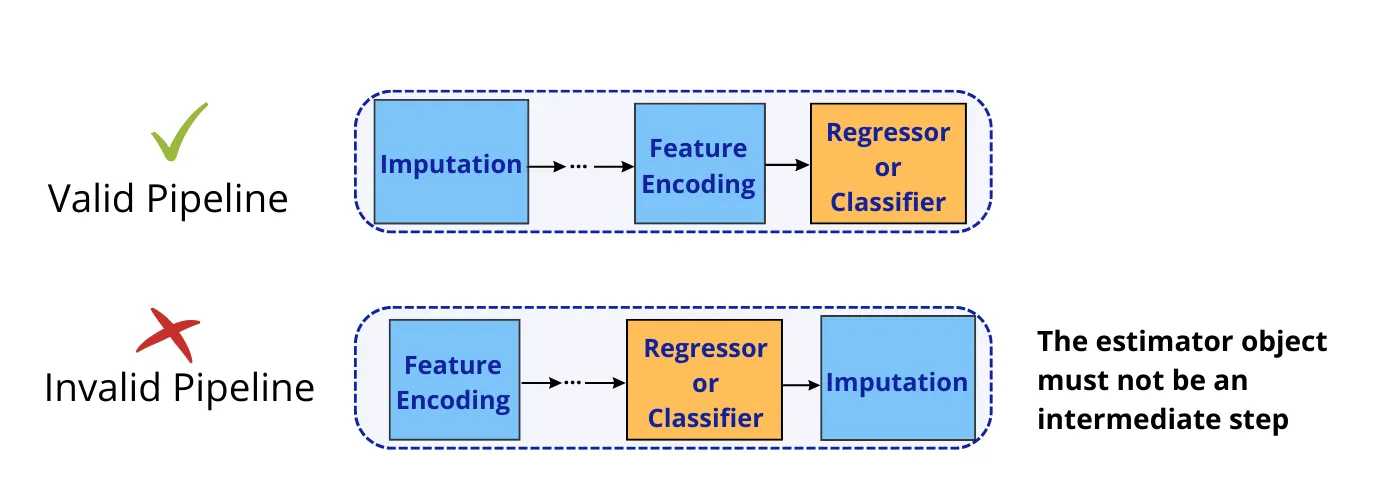

*Source: Hrishikesh Patel (Geek Culture)*


# Example 1: Categorical Features + Classification

In [ ]:
# Import necessary packages and modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
# Load the Titanic dataset
titanic_data = pd.read_csv('/content/drive/MyDrive/GFG/51. Model Pipelines - 27th April, 2024/data/titanic.csv')

In [ ]:
titanic_data.head()

In [ ]:
titanic_data.info()

In [ ]:
X = titanic_data[['Sex', 'Pclass', 'Embarked']] # categorical variables only
y = titanic_data['Survived']

In [ ]:
# define classification pipeline steps
clf_steps = [("ModeImputation", SimpleImputer(strategy='most_frequent')),
             ('Encoding', OneHotEncoder()),
             ('KNN', KNeighborsClassifier())]

In [ ]:
# instantiate pipeline
clf_pipeline = Pipeline(clf_steps)

In [ ]:
clf_pipeline

In [ ]:
# cross-validate the pipeline
cross_val_score(clf_pipeline, X, y, cv=5).mean()

# Example 2: Categorical Features + Numerical Features via Column Transformers

In [ ]:
# necessary imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
X = titanic_data[['Sex', 'Pclass', 'Embarked', 'Age']] # age is numerical
y = titanic_data['Survived']

In [ ]:
# numeric features preprocessing pipeline
num_feature_preprocessing = Pipeline([("MeanImputation", SimpleImputer(strategy='mean')),
                                      ("Scaler", MinMaxScaler())])

In [ ]:
# categorical features preprocessing pipeline
cat_feature_preprocessing = Pipeline([("ModeImputation", SimpleImputer(strategy='most_frequent')),
                                      ("Encoding", OneHotEncoder())])

In [ ]:
# applying the above pipelines to relevant columns
# the arguement remainder = 'passthrough' means the rest of the columns will be used as is (without transformation)
pre_processing = ColumnTransformer([("NumFeaturesPreprocessing", num_feature_preprocessing, ["Age"]),
                                    ("CatFeaturesPreprocessing", cat_feature_preprocessing, ["Sex", "Pclass", "Embarked"])],
                                    remainder='passthrough')

In [ ]:
# instantiate pipeline
clf_pipeline = Pipeline([('PreProcessing', pre_processing),
             ('KNN', KNeighborsClassifier())])

clf_pipeline

In [ ]:
# cross-validate the pipeline
cross_val_score(clf_pipeline, X, y, cv=5).mean()

# Example 3: Pipelines & GridSearch

Here we’ll first define a space of hyperparameters and then perform a grid search on the space. To refer to a specific parameter in a pipeline step, we’ll use the name of the step followed by double underscores and then the parameter name. For example, the `KNeighboursClassifier()` is named as `KNN` in our pipeline and its hyperparameter is n_neighbors. So we’ll write `KNN__n_neighbors` in the parameter grid to refer to a hyperparameter of k-nearest neighbors.

Additionally, the step `PreProcessing` has sub-pipelines, which we can refer to using double underscores e.g. `PreProcessing__NumFeaturesPreprocessing` or `PreProcessing__CatFeaturesPreprocessing`. In this way, we can drill down to a hyperparameter of a sub-pipeline e.g. `PreProcessing__CatFeaturesPreprocessing__Encoding`

In [ ]:
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {"PreProcessing__CatFeaturesPreprocessing__Encoding":[OneHotEncoder(), OrdinalEncoder()],
               "KNN__n_neighbors":np.arange(1, 50, 2)}

# perform grid search cross validation on the pipeline
grid_search = GridSearchCV(clf_pipeline, param_grid, cv=5)

# identify the optimum parameter set
grid_search.fit(X, y).best_params_

# Example 4: Pipeline with your own custom step `FunctionTransformer`

In [ ]:
def random_func(X):
  return X

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
help(FunctionTransformer)

In [ ]:
# numeric features preprocessing pipeline - here we used FunctionTransformer() for logarithm
num_feature_preprocessing = Pipeline([("MeanImputation", SimpleImputer(strategy='mean')),
                                      ("Log", FunctionTransformer(np.log10))])

In [ ]:
# categorical features preprocessing pipeline
cat_feature_preprocessing = Pipeline([("ModeImputation", SimpleImputer(strategy='most_frequent')),
                                      ("Encoding", OneHotEncoder())])

In [ ]:
# applying the above pipelines to relevant columns
pre_processing = ColumnTransformer([("NumFeaturesPreprocessing", num_feature_preprocessing, ["Age"]),
                                    ("CatFeaturesPreprocessing", cat_feature_preprocessing, ["Sex", "Pclass", "Embarked"])],
                                    remainder='passthrough')

In [ ]:
# classfication pipeline steps
clf_steps = [('PreProcessing', pre_processing),('KNN', KNeighborsClassifier())]

In [ ]:
# instantiate pipeline
clf_pipeline = Pipeline(clf_steps)
clf_pipeline

In [ ]:
# cross-validate the pipeline
cross_val_score(clf_pipeline, X, y, cv=5).mean()

# Example 5: Pipeline on text data

In [ ]:
# importing necessary libraries

import pandas as pd
import numpy as np

from nltk.stem import WordNetLemmatizer

from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

In [ ]:
toxic_data = pd.read_csv('/content/drive/MyDrive/GFG/51. Model Pipelines - 27th April, 2024/data/toxic.csv', nrows = 5000)
toxic_data.head()

In [ ]:
toxic_data.shape

In [ ]:
x = toxic_data['comment_text'].values
y = toxic_data['toxic'].values

In [ ]:
# pipeline parameters
scoring='roc_auc'
cv=3
max_features = 2500

In [ ]:
tfidf = TfidfVectorizer(max_features=max_features)
lr = LogisticRegression()
p = Pipeline([
    ('tfidf', tfidf),
    ('lr', lr)
])

In [ ]:
p

In [ ]:
cross_val_score(estimator=p, X=x, y=y, scoring=scoring, cv=cv).mean()

# Example 6: Pipeline on vision data

In [ ]:
from sklearn.datasets import load_digits
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the digits dataset
X_digits, y_digits = load_digits(return_X_y=True)

# Create a pipeline with a standard scaler and a logistic regression classifier
pipe = make_pipeline(StandardScaler(), LogisticRegression())

# Fit the pipeline to the data
pipe.fit(X_digits, y_digits)

# Make predictions on the test data
y_pred = pipe.predict(X_digits)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_digits)

# Print the accuracy
print(accuracy)